<img src="Tarjeta.png">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Documentación-SDK-python-Azure-Machine-Learning" data-toc-modified-id="Documentación-SDK-python-Azure-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Documentación SDK python Azure Machine Learning</a></span></li><li><span><a href="#Conectar-área-de-trabajo" data-toc-modified-id="Conectar-área-de-trabajo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Conectar área de trabajo</a></span></li><li><span><a href="#Ejecutar-un-experimento" data-toc-modified-id="Ejecutar-un-experimento-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ejecutar un experimento</a></span></li><li><span><a href="#Visualizar-detalles-de-la-ejecución" data-toc-modified-id="Visualizar-detalles-de-la-ejecución-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualizar detalles de la ejecución</a></span><ul class="toc-item"><li><span><a href="#Recuperar-los-detalles-del-experimento" data-toc-modified-id="Recuperar-los-detalles-del-experimento-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Recuperar los detalles del experimento</a></span></li></ul></li><li><span><a href="#Ejecutar-un-experimento-desde-un-script" data-toc-modified-id="Ejecutar-un-experimento-desde-un-script-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Ejecutar un experimento desde un script</a></span></li><li><span><a href="#Ver-el-histórico-de-experimentos" data-toc-modified-id="Ver-el-histórico-de-experimentos-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Ver el histórico de experimentos</a></span></li></ul></div>

# Experimentos

![experimentos](images/aml_experiments.JPG)

## Documentación SDK python Azure Machine Learning

Los científicos de datos y los desarrolladores de inteligencia artificial usan el SDK de Azure Machine Learning para Python para crear y ejecutar flujos de trabajo de aprendizaje automático con Azure Machine Learning Service. Puede interactuar con el servicio en cualquier entorno de Python, incluidos los cuadernos de Jupyter Notebook, Visual Studio Code o su IDE de Python favorito.

https://docs.microsoft.com/es-es/python/api/overview/azure/ml/?view=azure-ml-py

## Conectar área de trabajo

Todos los experimentos están asociados a recursos del área de trabajo de Azure Machine Learning. En la mayoría de los casos, deberemos guardar la configuración del área de trabajo en un JSON de configuración. Esto hace más sencillo reconectarse sin necesidad de recordar los detalles de la suscripción de Azure. Por otro lado, podemos descargarnos esta configuración del área de trabajo, pero si estan usando una Instancia de Proceso con tu área de trabajo, la configuración ya estará descargada en la ruta base.

In [2]:
import azureml.core
from azureml.core import Workspace

# Cargar el área de trabajo del fichero de configuración
ws = Workspace.from_config()
print('Versión de Azure ML {} y área de trabajo {}'.format(azureml.core.VERSION, ws.name))

Versión de Azure ML 1.32.0 y área de trabajo aml-nuclio


## Ejecutar un experimento

En este ejercicio aprenderemos a usar Azure ML *experiment* para ejecutar código de python y guardar valores extraídos de los datos. En este caso, usaremos un dataset que contiene información de la calidad del vino. Ejecutaremos el experimento para explorar los datos, extraer estadísticas, visualizaciones y datos de ejemplo.

Iniciando experimento: nuclio-vino
Analizando 4898 filas de los datos


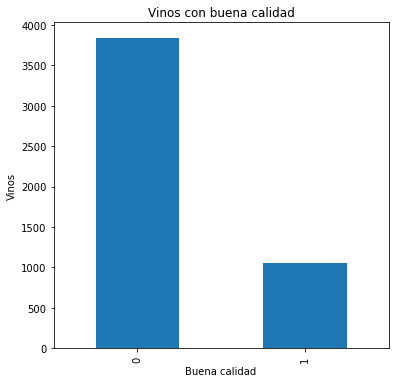

In [20]:
from azureml.core import Experiment
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# Crear un experimento en tu área de trabajo
experiment = Experiment(workspace=ws, name="nuclio-vino")

# Iniciamos el experimento
run = experiment.start_logging()
print("Iniciando experimento:", experiment.name)

# Cargar los datos de un fichero local
data = pd.read_csv('data/winequality.csv', sep=';', decimal='.')

# Contar filas y añadir el resultado al log
row_count = (len(data))
run.log('observaciones', row_count)
print('Analizando {} filas de los datos'.format(row_count))

# Visualización del conteo de la variable top_quality y añadiendolo al log
quality_counts = data['top_quality'].value_counts()
fig = plt.figure(figsize=(6,6))
ax = fig.gca()    
quality_counts.plot.bar(ax = ax) 
ax.set_title('Vinos con buena calidad') 
ax.set_xlabel('Buena calidad') 
ax.set_ylabel('Vinos')
plt.show()
run.log_image(name='distribucion top_quality', plot=fig)

# log conteo distintos ph
ph = data.ph.unique()
run.log_list('distintos ph', ph)

# Log resumen estadísticas para algunas variables
med_columns = ['density', 'total_sulfur_dioxide']
summary_stats = data[med_columns].describe().to_dict()
for col in summary_stats:
    keys = list(summary_stats[col].keys())
    values = list(summary_stats[col].values())
    for index in range(len(keys)):
        run.log_row(col, stat=keys[index], value = values[index])
        
# Guardar unos datos de muestra
data.sample(100).to_csv('sample.csv', index=False, header=True)
run.upload_file(name='outputs/sample.csv', path_or_stream='./sample.csv')

# Finalizar ejecución
run.complete()

## Visualizar detalles de la ejecución

En los notebooks, podemos usar **RunDetails** para ver los detalles de la ejecución

In [21]:
from azureml.widgets import RunDetails

RunDetails(run).show()

_UserRunWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', '…

### Recuperar los detalles del experimento

In [22]:
import json

# Conseguir las métricas del log
print("Métricas:")
metrics = run.get_metrics()
for metric_name in metrics:
    print(metric_name, ":", metrics[metric_name])

# Conseguir los ficheros del output
print("\nFicheros:")
files = run.get_file_names()
for file in files:
    print(file)

Métricas:
observaciones : 4898
distribucion top_quality : aml://artifactId/ExperimentRun/dcid.2272cabc-8fea-4dac-84f6-1276c884b14b/distribucion top_quality_1629728661.png
distintos ph : [3.0, 3.3, 3.26, 3.19, 3.18, 3.22, 2.99, 3.14, 3.54, 2.98, 3.25, 3.24, 3.33, 3.12, 3.17, 3.47, 3.05, 3.42, 3.45, 3.38, 3.1, 3.2, 3.37, 3.13, 3.21, 3.11, 3.16, 3.27, 3.36, 3.35, 3.34, 3.32, 3.31, 3.09, 3.03, 3.02, 3.15, 3.69, 2.95, 2.94, 3.39, 3.04, 2.89, 3.4, 3.01, 3.63, 3.29, 3.23, 3.28, 3.06, 3.08, 2.87, 2.93, 3.44, 3.5, 3.48, 3.72, 3.53, 3.52, 2.96, 3.61, 3.43, 3.49, 3.51, 3.46, 3.07, 2.97, 3.41, 3.64, 3.56, 2.86, 2.88, 2.85, 3.58, 3.55, 3.66, 3.59, 2.74, 2.92, 3.82, 3.81, 3.65, 2.9, 3.77, 2.91, 3.62, 3.74, 2.8, 3.6, 2.72, 2.79, 3.57, 3.8, 3.68, 2.77, 3.79, 3.7, 2.84, 3.76, 2.83, 3.75, 2.82, 3.67]
density : {'stat': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], 'value': [4898.0, 1.548363358513669, 6.838540529888256, 0.98711, 0.9917225000000001, 0.99374, 0.9961, 103.898]}
total_sulfur_d

Podemos descargar los ficheros generados en el expimento, usando el método **download_file** o **download_files**.

In [23]:
import os

download_folder = 'downloaded-files'

# Descarga los ficheros en la carpeta outputs
run.download_files(prefix='outputs', output_directory=download_folder)

# Válida que los ficheros se han descargado
for root, directories, filenames in os.walk(download_folder): 
    for filename in filenames:  
        print (os.path.join(root,filename))

downloaded-files/outputs/sample.csv


Si necesitas solucionar problemas del experimento ejecutado puedes usar el método **get_details** o el **get_details_with_logs**.

In [25]:
run.get_details_with_logs()

{'runId': '2272cabc-8fea-4dac-84f6-1276c884b14b',
 'target': 'local',
 'status': 'Completed',
 'startTimeUtc': '2021-08-23T14:24:19.752565Z',
 'endTimeUtc': '2021-08-23T14:24:28.266397Z',
 'properties': {'ContentSnapshotId': '66656625-e287-4a3a-9ff9-a9ec009488bc'},
 'inputDatasets': [],
 'outputDatasets': [],
 'logFiles': {},
 'submittedBy': 'Heri Nuclio'}

## Ejecutar un experimento desde un script

En el ejemplo anterior, ejecutabamos el experimento en línea en este notebook. Pero una solución mejor es crear un script separado para el experimento y usar Azure ML para ejecutar el experimento.

Vamos a crear una carpeta experiments donde guardaremos los scripts con los experimentos.

In [32]:
import os, shutil

# Crear una carpeta para los experimentos
folder_name = 'experimentos_vino'
experiment_folder = './' + folder_name
os.makedirs(folder_name, exist_ok=True)

# Copiar los datos a esa carpeta
shutil.copy('data/winequality.csv', os.path.join(folder_name, "winequality.csv"))

'experimentos_vino/winequality.csv'

Ahora vamos a crear un script de python que contiene el código de nuestro experimento y lo guardaremos en la carpeta

In [34]:
%%writefile $folder_name/experimento_vino.py
from azureml.core import Run
import pandas as pd
import os

# Contexto de la ejecución del experimento
run = Run.get_context()

# Cargar los datos
data = pd.read_csv('winequality.csv', sep=';', decimal='.')

# Contar filas y añadir el resultado al log
row_count = (len(data))
run.log('observaciones', row_count)
print('Analizando {} filas de los datos'.format(row_count))

# Log resumen estadísticas para algunas variables
med_columns = ['density', 'total_sulfur_dioxide']
summary_stats = data[med_columns].describe().to_dict()
for col in summary_stats:
    keys = list(summary_stats[col].keys())
    values = list(summary_stats[col].values())
    for index in range(len(keys)):
        run.log_row(col, stat=keys[index], value = values[index])  

# Guardar unos datos de muestra
data.sample(100).to_csv('sample.csv', index=False, header=True)
run.upload_file(name='outputs/sample.csv', path_or_stream='./sample.csv')

# Finalizar ejecución
run.complete()

Overwriting experimentos_vino/experimento_vino.py


Para ejecutar el script, necesitamos crear un **ScriptRunConfig** que identifica el script de python para ejecutar el experimento y lo ejecuta en base a ello.

> **Nota**: El ScriptRunConfig también determina el Compute Target y el environment de python. Sin embargo, en este caso, el environment de python esta definido por Conda y pip packages, pero el Compute Target esta omitido (usará local por defecto)

In [35]:
from azureml.core import Experiment, ScriptRunConfig, Environment
from azureml.widgets import RunDetails

# Crear el environment de python para el experimento
env = Environment.from_conda_specification("experiment_env", "environment.yml")

#Crear el script config
script_config = ScriptRunConfig(source_directory=experiment_folder,
                                script='experimento_vino.py',
                                environment=env)

# Ejecutar experimento
experiment = Experiment(workspace=ws, name='nuclio-vino')
run = experiment.submit(config=script_config)
RunDetails(run).show()
run.wait_for_completion()

_UserRunWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', '…

{'runId': 'nuclio-vino_1629731051_02bf7bf7',
 'target': 'local',
 'status': 'Finalizing',
 'startTimeUtc': '2021-08-23T15:04:15.135034Z',
 'properties': {'_azureml.ComputeTargetType': 'local',
  'ContentSnapshotId': '76776c96-397e-4df6-981a-af2e25872fd5'},
 'inputDatasets': [],
 'outputDatasets': [],
 'runDefinition': {'script': 'experimento_vino.py',
  'command': '',
  'useAbsolutePath': False,
  'arguments': [],
  'sourceDirectoryDataStore': None,
  'framework': 'Python',
  'communicator': 'None',
  'target': 'local',
  'dataReferences': {},
  'data': {},
  'outputData': {},
  'datacaches': [],
  'jobName': None,
  'maxRunDurationSeconds': 2592000,
  'nodeCount': 1,
  'priority': None,
  'credentialPassthrough': False,
  'identity': None,
  'environment': {'name': 'experiment_env',
   'version': 'Autosave_2021-08-23T15:00:54Z_7e64fd3a',
   'python': {'interpreterPath': 'python',
    'userManagedDependencies': False,
    'condaDependencies': {'dependencies': ['python=3.6.2',
      'sc

Como antes podemos ver el experimento en [Azure Machine Learning studio](https://ml.azure.com)

In [36]:
# Métricas del log
metrics = run.get_metrics()
for key in metrics.keys():
        print(key, metrics.get(key))
print('\n')
for file in run.get_file_names():
    print(file)

observaciones 4898
density {'stat': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], 'value': [4898.0, 1.548363358513679, 6.838540529888251, 0.98711, 0.9917225000000001, 0.99374, 0.9961, 103.898]}
total_sulfur_dioxide {'stat': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], 'value': [4898.0, 138.36065741118824, 42.49806455414291, 9.0, 108.0, 134.0, 167.0, 440.0]}


azureml-logs/60_control_log.txt
azureml-logs/70_driver_log.txt
logs/azureml/7527_azureml.log
outputs/sample.csv


Esta vez, la ejecución genera algunos ficheros de log que puedes ver en el widget o usando **get_details_with_logs** método.

In [37]:
run.get_details_with_logs()

{'runId': 'nuclio-vino_1629731051_02bf7bf7',
 'target': 'local',
 'status': 'Completed',
 'startTimeUtc': '2021-08-23T15:04:15.135034Z',
 'endTimeUtc': '2021-08-23T15:04:25.398939Z',
 'properties': {'_azureml.ComputeTargetType': 'local',
  'ContentSnapshotId': '76776c96-397e-4df6-981a-af2e25872fd5'},
 'inputDatasets': [],
 'outputDatasets': [],
 'runDefinition': {'script': 'experimento_vino.py',
  'command': '',
  'useAbsolutePath': False,
  'arguments': [],
  'sourceDirectoryDataStore': None,
  'framework': 'Python',
  'communicator': 'None',
  'target': 'local',
  'dataReferences': {},
  'data': {},
  'outputData': {},
  'datacaches': [],
  'jobName': None,
  'maxRunDurationSeconds': 2592000,
  'nodeCount': 1,
  'priority': None,
  'credentialPassthrough': False,
  'identity': None,
  'environment': {'name': 'experiment_env',
   'version': 'Autosave_2021-08-23T15:00:54Z_7e64fd3a',
   'python': {'interpreterPath': 'python',
    'userManagedDependencies': False,
    'condaDependencies'

También puedes descargar los detalles del log porque suele ser más sencillo verlo en un editor de texto.

In [38]:
import os

log_folder = 'downloaded-logs'

# Descargar todos los ficheros
run.get_all_logs(destination=log_folder)

# Válida que los ficheros se han descargado
for root, directories, filenames in os.walk(log_folder): 
    for filename in filenames:  
        print (os.path.join(root,filename))

downloaded-logs/azureml-logs/60_control_log.txt
downloaded-logs/azureml-logs/70_driver_log.txt
downloaded-logs/logs/azureml/7527_azureml.log


## Ver el histórico de experimentos

Puedes ver el histórico en [Azure Machine Learning studio](https://ml.azure.com) y explorar cada ejecución. Aunque también lo puedes hacer desde el SDK.

In [39]:
from azureml.core import Experiment, Run

diabetes_experiment = ws.experiments['nuclio-vino']
for logged_run in diabetes_experiment.get_runs():
    print('Run ID:', logged_run.id)
    metrics = logged_run.get_metrics()
    for key in metrics.keys():
        print('-', key, metrics.get(key))

Run ID: nuclio-vino_1629731051_02bf7bf7
- observaciones 4898
- density {'stat': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], 'value': [4898.0, 1.548363358513679, 6.838540529888251, 0.98711, 0.9917225000000001, 0.99374, 0.9961, 103.898]}
- total_sulfur_dioxide {'stat': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], 'value': [4898.0, 138.36065741118824, 42.49806455414291, 9.0, 108.0, 134.0, 167.0, 440.0]}
Run ID: nuclio-vino_1629730853_9fe2801e
Run ID: 2272cabc-8fea-4dac-84f6-1276c884b14b
- observaciones 4898
- distribucion top_quality aml://artifactId/ExperimentRun/dcid.2272cabc-8fea-4dac-84f6-1276c884b14b/distribucion top_quality_1629728661.png
- distintos ph [3.0, 3.3, 3.26, 3.19, 3.18, 3.22, 2.99, 3.14, 3.54, 2.98, 3.25, 3.24, 3.33, 3.12, 3.17, 3.47, 3.05, 3.42, 3.45, 3.38, 3.1, 3.2, 3.37, 3.13, 3.21, 3.11, 3.16, 3.27, 3.36, 3.35, 3.34, 3.32, 3.31, 3.09, 3.03, 3.02, 3.15, 3.69, 2.95, 2.94, 3.39, 3.04, 2.89, 3.4, 3.01, 3.63, 3.29, 3.23, 3.28, 3.06, 3.08, 